In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor


from strinng.hypergraph import Hyperedge, Hypergraph, Vertex
from strinng.gui.mpldraw import MplArtist

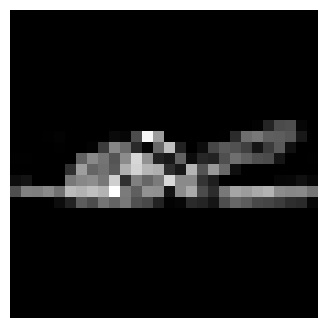

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
figure = plt.figure(figsize=(4, 4))
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [3]:
img.shape

torch.Size([1, 28, 28])

In [4]:
nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=0)(img).shape

torch.Size([4, 26, 26])

In [5]:
4 * 26 * 26

2704

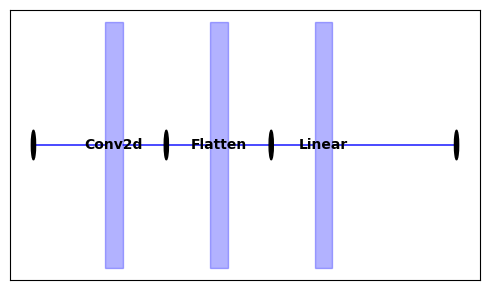

In [10]:
net = Hypergraph()

# Input: a single 28 x 28 image
i = net.add_vertex(Vertex(torch.Size([28, 28])))
net.inputs = [i]
x1 = net.add_vertex(Vertex(torch.Size([4, 26, 26])))
net.add_edge(
    Hyperedge(nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=0),
              [i], [x1])
)
x2 = net.add_vertex(Vertex(torch.Size([4 * 26 * 26])))
net.add_edge(
    Hyperedge(nn.Flatten(),
              [x1], [x2])
)
x3 = net.add_vertex(Vertex(torch.Size([1])))
net.add_edge(
    Hyperedge(nn.Linear(4*26*26, 1),
              [x2], [x3])
)
net.outputs = [x3]
mpl = MplArtist(net)
mpl.draw(figsize=(5, 3))
plt.show()


In [13]:
net.forward(img.unsqueeze(0))

[tensor([[-0.0949]], grad_fn=<AddmmBackward0>)]

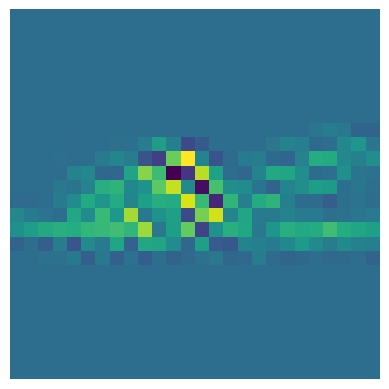

In [18]:
act = net.vertices[x1].cached_value.squeeze().detach()[0]
plt.imshow(act)
plt.axis('off')
plt.show()